# What we Deal here
-> drivers who are most successful in F1 history


-> constructors who are most successful in F1 history


-> Analysis of starting position and ending position


-> Speed of cars variation across Gp's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#loading datasets and i will rename the the columns for my convinient
results=pd.read_csv('results.csv')
races=pd.read_csv('races.csv')
drivers=pd.read_csv('drivers.csv')
constructors=pd.read_csv('constructors.csv')
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [3]:
#merging datasets
df = pd.merge(results, races[['raceId','year','name','round']], on = 'raceId', how='left')
df = pd.merge(df, drivers[['driverId','driverRef','nationality']], on = 'driverId', how='left') 
df = pd.merge(df, constructors[['constructorId','name','nationality']], on = 'constructorId', how='left') 
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'name_x', 'round', 'driverRef',
       'nationality_x', 'name_y', 'nationality_y'],
      dtype='object')

In [4]:
#dropping some unwanted columns 
df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId','raceId','driverId','constructorId'],axis=1,inplace=True)


In [5]:
df.columns


Index(['grid', 'positionOrder', 'points', 'time', 'milliseconds', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'year', 'name_x', 'round',
       'driverRef', 'nationality_x', 'name_y', 'nationality_y'],
      dtype='object')

In [6]:
df.rename(columns={'rank':'fastestLapRank','name_x':'gpName','nationality_x':'driverNationality',
                   'name_y':'constructorName','nationality_y':'constructorNationality','driverRef':'driver'},inplace=True)

In [7]:
df.columns

Index(['grid', 'positionOrder', 'points', 'time', 'milliseconds',
       'fastestLapRank', 'fastestLapTime', 'fastestLapSpeed', 'year', 'gpName',
       'round', 'driver', 'driverNationality', 'constructorName',
       'constructorNationality'],
      dtype='object')

In [8]:
df=df[['year','gpName', 'round', 'driver','constructorName','grid', 'positionOrder', 'points', 'time', 'milliseconds',
       'fastestLapRank', 'fastestLapTime', 'fastestLapSpeed', 'driverNationality', 'constructorNationality']]
df.head()

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British


In [9]:
#dropping season 2022 since its incomplete


df=df[df['year']!=2022]

In [10]:
#sorting values
df=df.sort_values(by=['year','round','positionOrder'],ascending=[False,True,True])
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
24960,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897,4,1:34.015,207.235,British,German
24961,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642,2,1:33.228,208.984,Dutch,Austrian
24962,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280,1,1:32.090,211.566,Finnish,German
24963,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363,6,1:34.396,206.398,British,British
24964,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944,3,1:33.970,207.334,Mexican,Austrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,\N,\N,\N,\N,\N,Italian,Swiss
20172,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,\N,\N,\N,\N,\N,French,French
20173,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,\N,\N,\N,\N,\N,Thai,Italian
20174,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,\N,\N,\N,\N,\N,German,Italian


In [11]:
#replacing \n  values 
df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastestLapRank.replace('\\N',np.nan,inplace=True)
df.fastestLapTime.replace('\\N',np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace=True)

In [12]:
df.dtypes

year                        int64
gpName                     object
round                       int64
driver                     object
constructorName            object
grid                        int64
positionOrder               int64
points                    float64
time                       object
milliseconds               object
fastestLapRank             object
fastestLapTime             object
fastestLapSpeed            object
driverNationality          object
constructorNationality     object
dtype: object

In [13]:
#changing datatypes
df.milliseconds=df.milliseconds.astype(float)
df.fastestLapRank=df.fastestLapRank.astype(float)
df.fastestLapSpeed=df.fastestLapSpeed.astype(float)
df.dtypes

year                        int64
gpName                     object
round                       int64
driver                     object
constructorName            object
grid                        int64
positionOrder               int64
points                    float64
time                       object
milliseconds              float64
fastestLapRank            float64
fastestLapTime             object
fastestLapSpeed           float64
driverNationality          object
constructorNationality     object
dtype: object

In [14]:
#Will reset the index 
df.reset_index(drop=True, inplace=True)
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642.0,2.0,1:33.228,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280.0,1.0,1:32.090,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363.0,6.0,1:34.396,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944.0,3.0,1:33.970,207.334,Mexican,Austrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Swiss
25396,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,NaN,NaN,NaN,NaN,French,French
25397,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,NaN,NaN,NaN,NaN,Thai,Italian
25398,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,NaN,NaN,NaN,NaN,German,Italian


In [15]:
df.shape

(25400, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25400 entries, 0 to 25399
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    25400 non-null  int64  
 1   gpName                  25400 non-null  object 
 2   round                   25400 non-null  int64  
 3   driver                  25400 non-null  object 
 4   constructorName         25400 non-null  object 
 5   grid                    25400 non-null  int64  
 6   positionOrder           25400 non-null  int64  
 7   points                  25400 non-null  float64
 8   time                    6809 non-null   object 
 9   milliseconds            6808 non-null   float64
 10  fastestLapRank          7151 non-null   float64
 11  fastestLapTime          6953 non-null   object 
 12  fastestLapSpeed         6953 non-null   float64
 13  driverNationality       25400 non-null  object 
 14  constructorNationality  25400 non-null

In [17]:
df.head(10)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642.0,2.0,1:33.228,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280.0,1.0,1:32.090,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363.0,6.0,1:34.396,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944.0,3.0,1:33.970,207.334,Mexican,Austrian
5,2021,Bahrain Grand Prix,1,leclerc,Ferrari,4,6,8.0,+59.090,5582987.0,11.0,1:34.988,205.112,Monegasque,Italian
6,2021,Bahrain Grand Prix,1,ricciardo,McLaren,6,7,6.0,+66.004,5589901.0,10.0,1:34.932,205.233,Australian,British
7,2021,Bahrain Grand Prix,1,sainz,Ferrari,8,8,4.0,+67.100,5590997.0,7.0,1:34.509,206.151,Spanish,Italian
8,2021,Bahrain Grand Prix,1,tsunoda,AlphaTauri,13,9,2.0,+85.692,5609589.0,8.0,1:34.761,205.603,Japanese,Italian
9,2021,Bahrain Grand Prix,1,stroll,Aston Martin,10,10,1.0,+86.713,5610610.0,9.0,1:34.865,205.378,Canadian,British


In [18]:
#setting fig size and color set for futher plots
sns.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

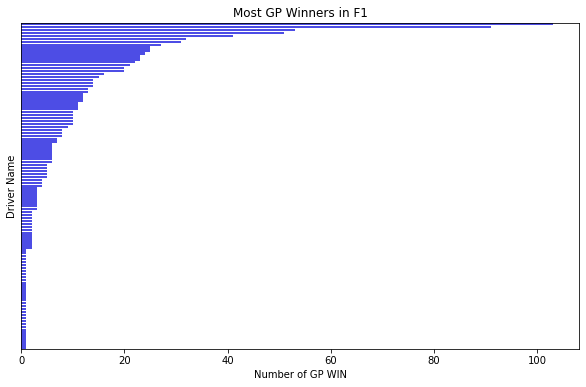

In [46]:
#gp Winners
driverWinner=df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#bar plot
sns.barplot(data=driverWinner,y='driver',x='positionOrder',color='blue',alpha=0.8,)
plt.title('Most GP Winners in F1')
plt.xlabel('Number of GP WIN')
plt.ylabel('Driver Name')
plt.yticks([])


In [43]:
#picking out TOP 10 Drivers
top10Drivers=driverWinner.head(10)
top10Drivers

,driver,positionOrder
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,senna,41
5,alonso,32
6,mansell,31
7,stewart,27
8,lauda,25
9,clark,25


Text(0, 0.5, 'Driver Name')

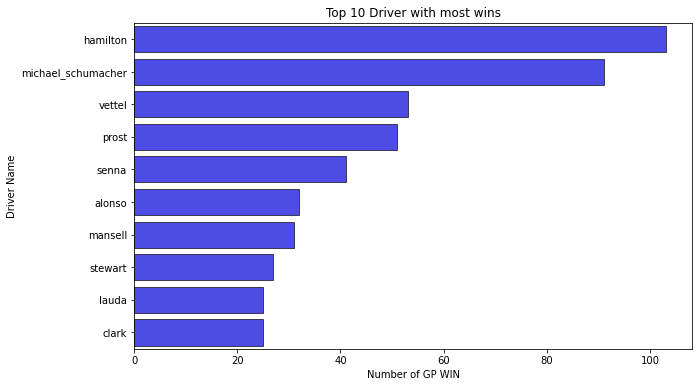

In [56]:
#creating a plot for top 10 drivers


sns.barplot(data=top10Drivers,y='driver',x='positionOrder',color='blue',alpha=0.8,linewidth=0.8,edgecolor='Black')
plt.title('Top 10 Driver with most wins')
plt.xlabel('Number of GP WIN')
plt.ylabel('Driver Name')

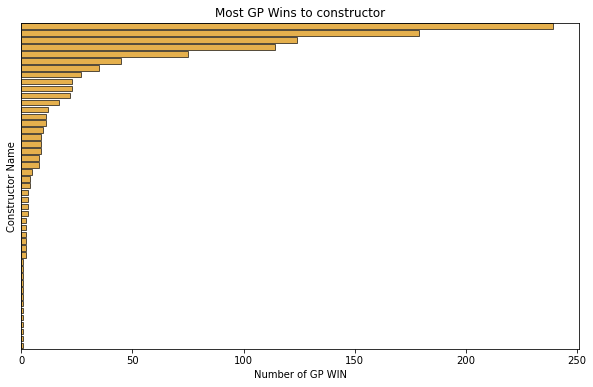

In [49]:
#top GP constructors winners 
constructorWinners=df.loc[df['positionOrder']==1].groupby('constructorName')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#barplot

sns.barplot(data=constructorWinners,y='constructorName',x='positionOrder',color='orange',alpha=0.8,linewidth=0.8,edgecolor='black')
plt.title('Most GP Wins to constructor')
plt.xlabel('Number of GP WIN')
plt.ylabel('Constructor Name')
plt.yticks([]);

In [51]:
#picking out TOP 10 Constructors
top10Constructors=constructorWinners.head(10)
top10Constructors

,constructorName,positionOrder
0,Ferrari,239
1,McLaren,179
2,Mercedes,124
3,Williams,114
4,Red Bull,75
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Tyrrell,23
9,Brabham,23


Text(0, 0.5, 'Constructor Name')

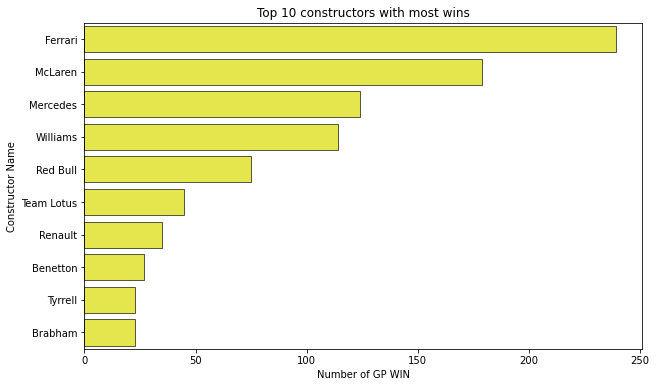

In [55]:
#barchart for top 10 constructors

sns.barplot(data=top10Constructors,y='constructorName',x='positionOrder',color='yellow',alpha=0.8,linewidth=0.8,edgecolor='black')
plt.title('Top 10 constructors with most wins')
plt.xlabel('Number of GP WIN')
plt.ylabel('Constructor Name')


In [59]:
df

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642.0,2.0,1:33.228,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280.0,1.0,1:32.090,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363.0,6.0,1:34.396,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944.0,3.0,1:33.970,207.334,Mexican,Austrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Swiss
25396,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,NaN,NaN,NaN,NaN,French,French
25397,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,NaN,NaN,NaN,NaN,Thai,Italian
25398,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,NaN,NaN,NaN,NaN,German,Italian


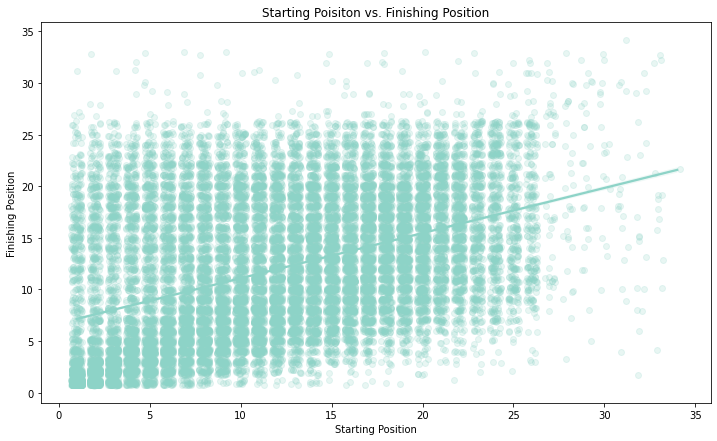

In [58]:
#regression plot to show how the starting point and ending points vary

#will remove 0's in grid column
dfNonZeros=df[df['grid']!=0]

#creating a plot
plt.figure(figsize=[12,7])
sns.regplot(data = dfNonZeros, x = 'grid', y = 'positionOrder', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5});
plt.title('Starting Poisiton vs. Finishing Position')
plt.ylabel('Finishing Position')
plt.xlabel('Starting Position');

In [65]:
#checkimg wether the speed of the cars changed over the years 
#we will take the year from 2004 onwards

dfSpeed=df[df['year']>=2004]
#dfSpeed
dfGroupSpeed=dfSpeed.groupby(['gpName','year'])['fastestLapSpeed'].mean().to_frame().reset_index()
dfGroupSpeed

,gpName,year,fastestLapSpeed
0,70th Anniversary Grand Prix,2020,234.248250
1,Abu Dhabi Grand Prix,2009,198.041100
2,Abu Dhabi Grand Prix,2010,193.559045
3,Abu Dhabi Grand Prix,2011,189.779522
4,Abu Dhabi Grand Prix,2012,187.682739
...,...,...,...
339,United States Grand Prix,2016,191.745143
340,United States Grand Prix,2017,197.839400
341,United States Grand Prix,2018,199.424944
342,United States Grand Prix,2019,199.076600


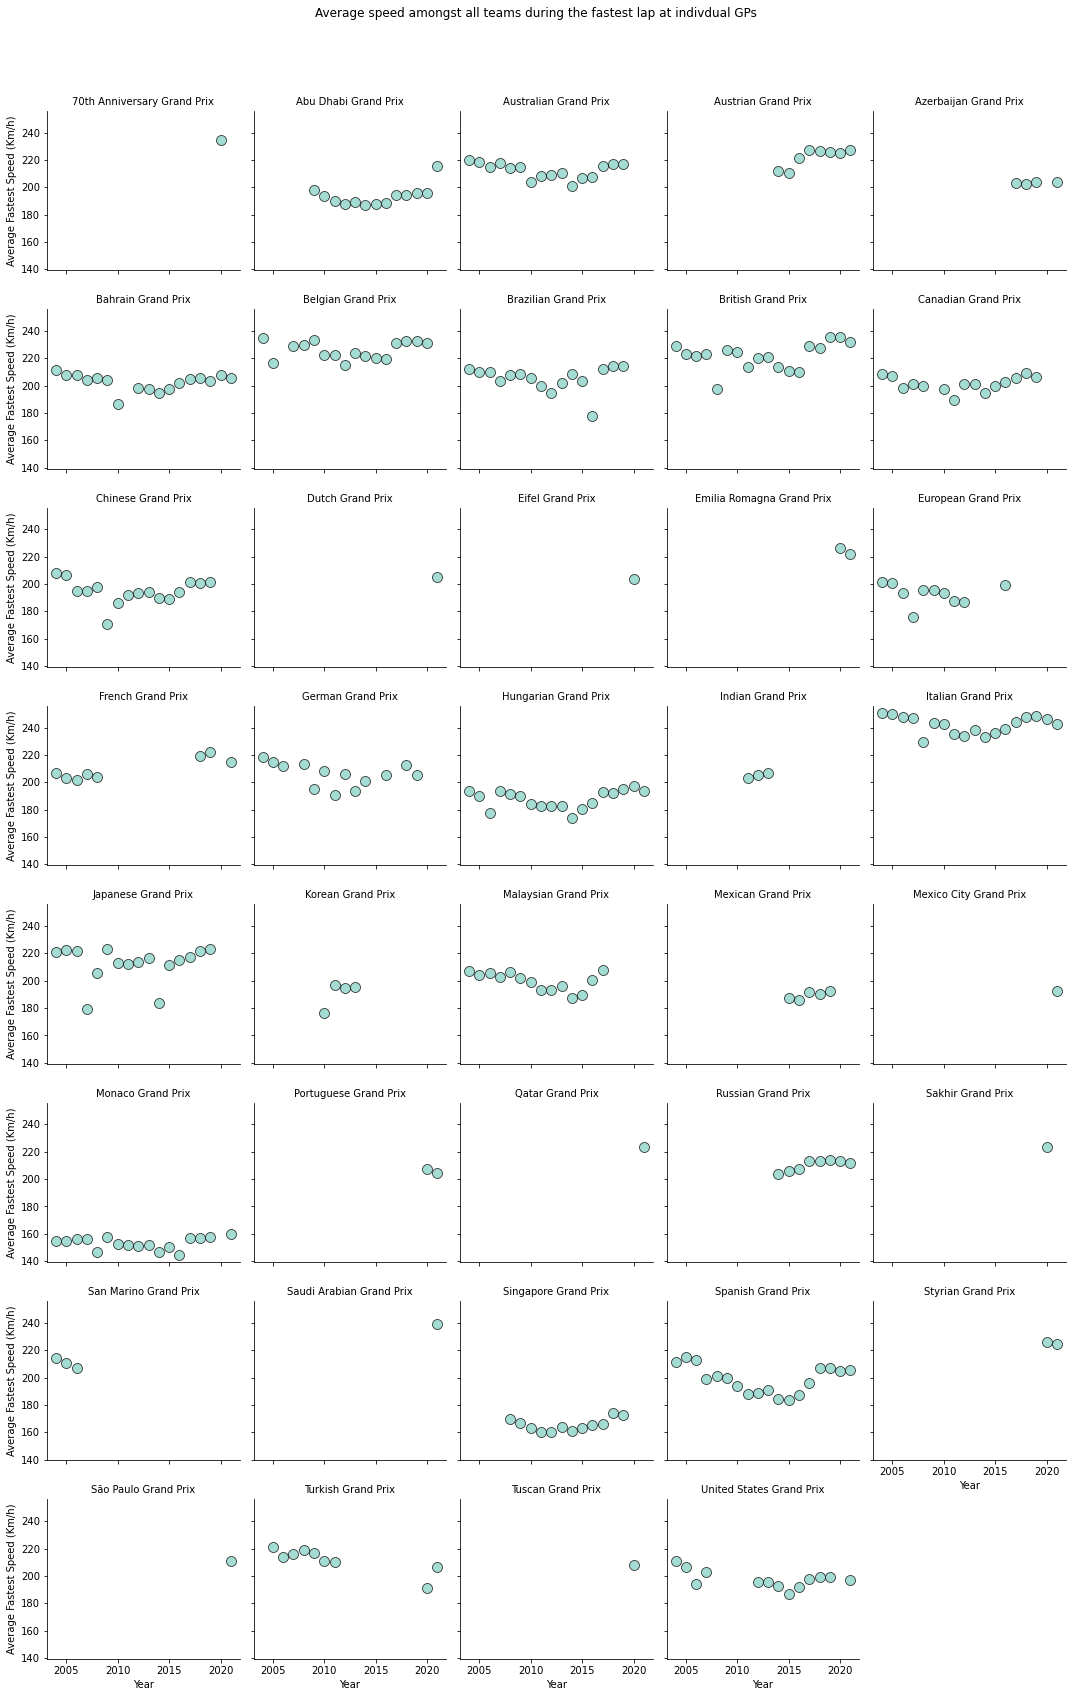

In [69]:
#create facetgrid

g = sns.FacetGrid(data = dfGroupSpeed, col = 'gpName', col_wrap = 5)
g.map(plt.scatter,'year','fastestLapSpeed',alpha=0.8,linewidth=0.8,edgecolor='black',s=100)
g.set_titles('{col_name}')
g.set_xlabels('Year')
g.set_ylabels('Average Fastest Speed (Km/h)')
plt.subplots_adjust(top=.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at indivdual GPs');